In [1]:
import holidays
import pandas as pd
import glob
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import folium
pd.set_option("display.max_columns",1000)
pd.set_option('display.max_rows', 17544) 
import matplotlib as mpl
from matplotlib import colors
import geopandas as gpd
import calendar
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.figsize'] = (10, 8) #this increases the inline figure size to 15 tall x 10 wide
path = "/Users/sreevathsadb/Masters/Project/Data/"

/Users/sreevathsadb/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [3]:
df_11_18 = pd.read_csv(path + 'old/db_11_19.csv')
df_11_18['TIME'] = pd.to_datetime(df_11_18['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_11_18['year'] = pd.DatetimeIndex(df_11_18['timestamp']).year
df_11_18['month'] = pd.DatetimeIndex(df_11_18['timestamp']).month
df_11_18['day'] = pd.DatetimeIndex(df_11_18['timestamp']).day
df_11_18['hour'] = pd.DatetimeIndex(df_11_18['timestamp']).hour
df_11_18['minute'] = pd.DatetimeIndex(df_11_18['timestamp']).minute
df_11_18['weekday'] = pd.DatetimeIndex(df_11_18['timestamp']).weekday
df_11_18 = df_11_18[df_11_18['year']!=2019]
df_11_18.columns

Index(['tfl_id', 'bikes', 'spaces', 'total_docks', 'timestamp', 'TIME', 'year',
       'month', 'day', 'hour', 'minute', 'weekday'],
      dtype='object')

In [4]:
path = path + 'Covid_Years/' # use your path
file_paths = glob.glob(path + "20*")
combined_19_21 = []

for filename in file_paths:
    df_19_22 = pd.read_csv(filename, index_col=None, header=0)
    combined_19_21.append(df_19_22)
df_19_22 = pd.concat(combined_19_21, axis=0, ignore_index=True)

In [5]:
df_19_22['TIME'] = pd.to_datetime(df_19_22['TIME'], format='%Y-%m-%d %H:%M:%S')
df_19_22['year'] = pd.DatetimeIndex(df_19_22['TIME']).year
df_19_22['month'] = pd.DatetimeIndex(df_19_22['TIME']).month
df_19_22['day'] = pd.DatetimeIndex(df_19_22['TIME']).day
df_19_22['hour'] = pd.DatetimeIndex(df_19_22['TIME']).hour
df_19_22['minute'] = pd.DatetimeIndex(df_19_22['TIME']).minute
df_19_22['weekday'] = pd.DatetimeIndex(df_19_22['TIME']).weekday
df_19_22.columns

Index(['STATION ID', 'TIME', 'LAST UPDATED', 'NAME', 'BIKE STANDS',
       'AVAILABLE BIKE STANDS', 'AVAILABLE BIKES', 'STATUS', 'ADDRESS',
       'LATITUDE', 'LONGITUDE', 'year', 'month', 'day', 'hour', 'minute',
       'weekday'],
      dtype='object')

In [6]:
print(len(df_19_22[df_19_22['STATUS']=='Close']))
df_19_22[df_19_22['STATUS']=='Close'].sample(5)


106080


,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,year,month,day,hour,minute,weekday
2183,16,2020-01-01 06:25:02,2020-01-01 06:22:40,GEORGES QUAY,20,0,0,Close,Georges Quay,53.347507,-6.252192,2020,1,1,6,25,2
2184,16,2020-01-01 06:30:02,2020-01-01 06:22:40,GEORGES QUAY,20,0,0,Close,Georges Quay,53.347507,-6.252192,2020,1,1,6,30,2
2185,16,2020-01-01 06:35:02,2020-01-01 06:32:48,GEORGES QUAY,20,0,0,Close,Georges Quay,53.347507,-6.252192,2020,1,1,6,35,2
2186,16,2020-01-01 06:40:03,2020-01-01 06:32:48,GEORGES QUAY,20,0,0,Close,Georges Quay,53.347507,-6.252192,2020,1,1,6,40,2
2187,16,2020-01-01 06:45:02,2020-01-01 06:42:56,GEORGES QUAY,20,0,0,Close,Georges Quay,53.347507,-6.252192,2020,1,1,6,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040334,35,2019-06-12 08:10:02,2019-06-12 08:04:20,SMITHFIELD,30,0,0,Close,Smithfield,53.347691,-6.278214,2019,6,12,8,10,2
33040335,35,2019-06-12 08:15:02,2019-06-12 08:04:20,SMITHFIELD,30,0,0,Close,Smithfield,53.347691,-6.278214,2019,6,12,8,15,2
33040336,35,2019-06-12 08:20:02,2019-06-12 08:14:31,SMITHFIELD,30,0,0,Close,Smithfield,53.347691,-6.278214,2019,6,12,8,20,2
33040337,35,2019-06-12 08:25:02,2019-06-12 08:14:31,SMITHFIELD,30,0,0,Close,Smithfield,53.347691,-6.278214,2019,6,12,8,25,2


In [7]:
print("Before removing Closed status rows",df_19_22.shape)
df_19_22 = df_19_22[df_19_22['STATUS']=='Open']
print("After moving Closed status rows",df_19_22.shape)

Before removing Closed status rows (33048476, 17)
After moving Closed status rows (32942396, 17)


### Renaming and Combining all datasets

In [8]:
cleaned_df_19_22 = df_19_22[['STATION ID','TIME','BIKE STANDS','AVAILABLE BIKE STANDS','AVAILABLE BIKES','year','month','day','hour','minute','weekday']]
cleaned_df_11_19 = df_11_18[['tfl_id','timestamp','total_docks','spaces','bikes','year','month','day','hour','minute','weekday']]

cleaned_df_19_22.rename(columns = {'STATION ID':'id', 'TIME':'time','BIKE STANDS':'total_bike_stands','AVAILABLE BIKE STANDS':'available_bike_stands','AVAILABLE BIKES':'available_bikes'}, inplace = True)
cleaned_df_11_19.rename(columns = {'tfl_id':'id', 'timestamp':'time','total_docks':'total_bike_stands','spaces':'available_bike_stands','bikes':'available_bikes'}, inplace = True)

cleaned_df_19_22 = cleaned_df_19_22.reset_index(drop=True)
combined_11_22 = pd.concat([cleaned_df_11_19, cleaned_df_19_22], axis=0)

conditions = [
    (combined_11_22['weekday'] == 0),(combined_11_22['weekday'] == 1),(combined_11_22['weekday'] == 2),
   (combined_11_22['weekday'] == 3),(combined_11_22['weekday'] == 4),(combined_11_22['weekday'] == 5),
   (combined_11_22['weekday'] == 6)
    ]
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
combined_11_22['weekday'] = np.select(conditions, day_name)


/Users/sreevathsadb/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
print("Before dropping Duplicates ",combined_11_22.shape)
combined_11_22 = combined_11_22.drop_duplicates()
print("After dropping Duplicates ",combined_11_22.shape)

Before dropping Duplicates  (64971289, 11)
After dropping Duplicates  (64701207, 11)


In [10]:
combined_11_22['id'].unique()

array([  17,   15,   18,    1,   19,    6,    2,   23,   21,   22,   20,
         40,   39,   16,   37,   38,   14,   13,   12,   11,   10,    9,
         36,    8,   30,   29,   28,   27,   26,   25,   35,   34,    7,
          5,    4,   32,   31,   24,    3,   33,   42,   41,   43,   44,
       5001,   65,   45,   46,   54,   48,   63,   52,   56,   51,   57,
         66,   67,   64,   62,   69,   68,   90,   59,   60,   99,   53,
         58,   61,   89,   70,   91,   73,   88,   72,   74,   79,   82,
         81,   84,   83,   85,   98,   77,  101,   96,  102,   80,   76,
         78,   87,   86,  100,   93,   71,   94,   92,   49,   75,   55,
         95,   97,   47,  103,  104,   50,  105,  106,  107,  108,  112,
        110,  111,  114,  113,  115,  109,  117,  116,  507])

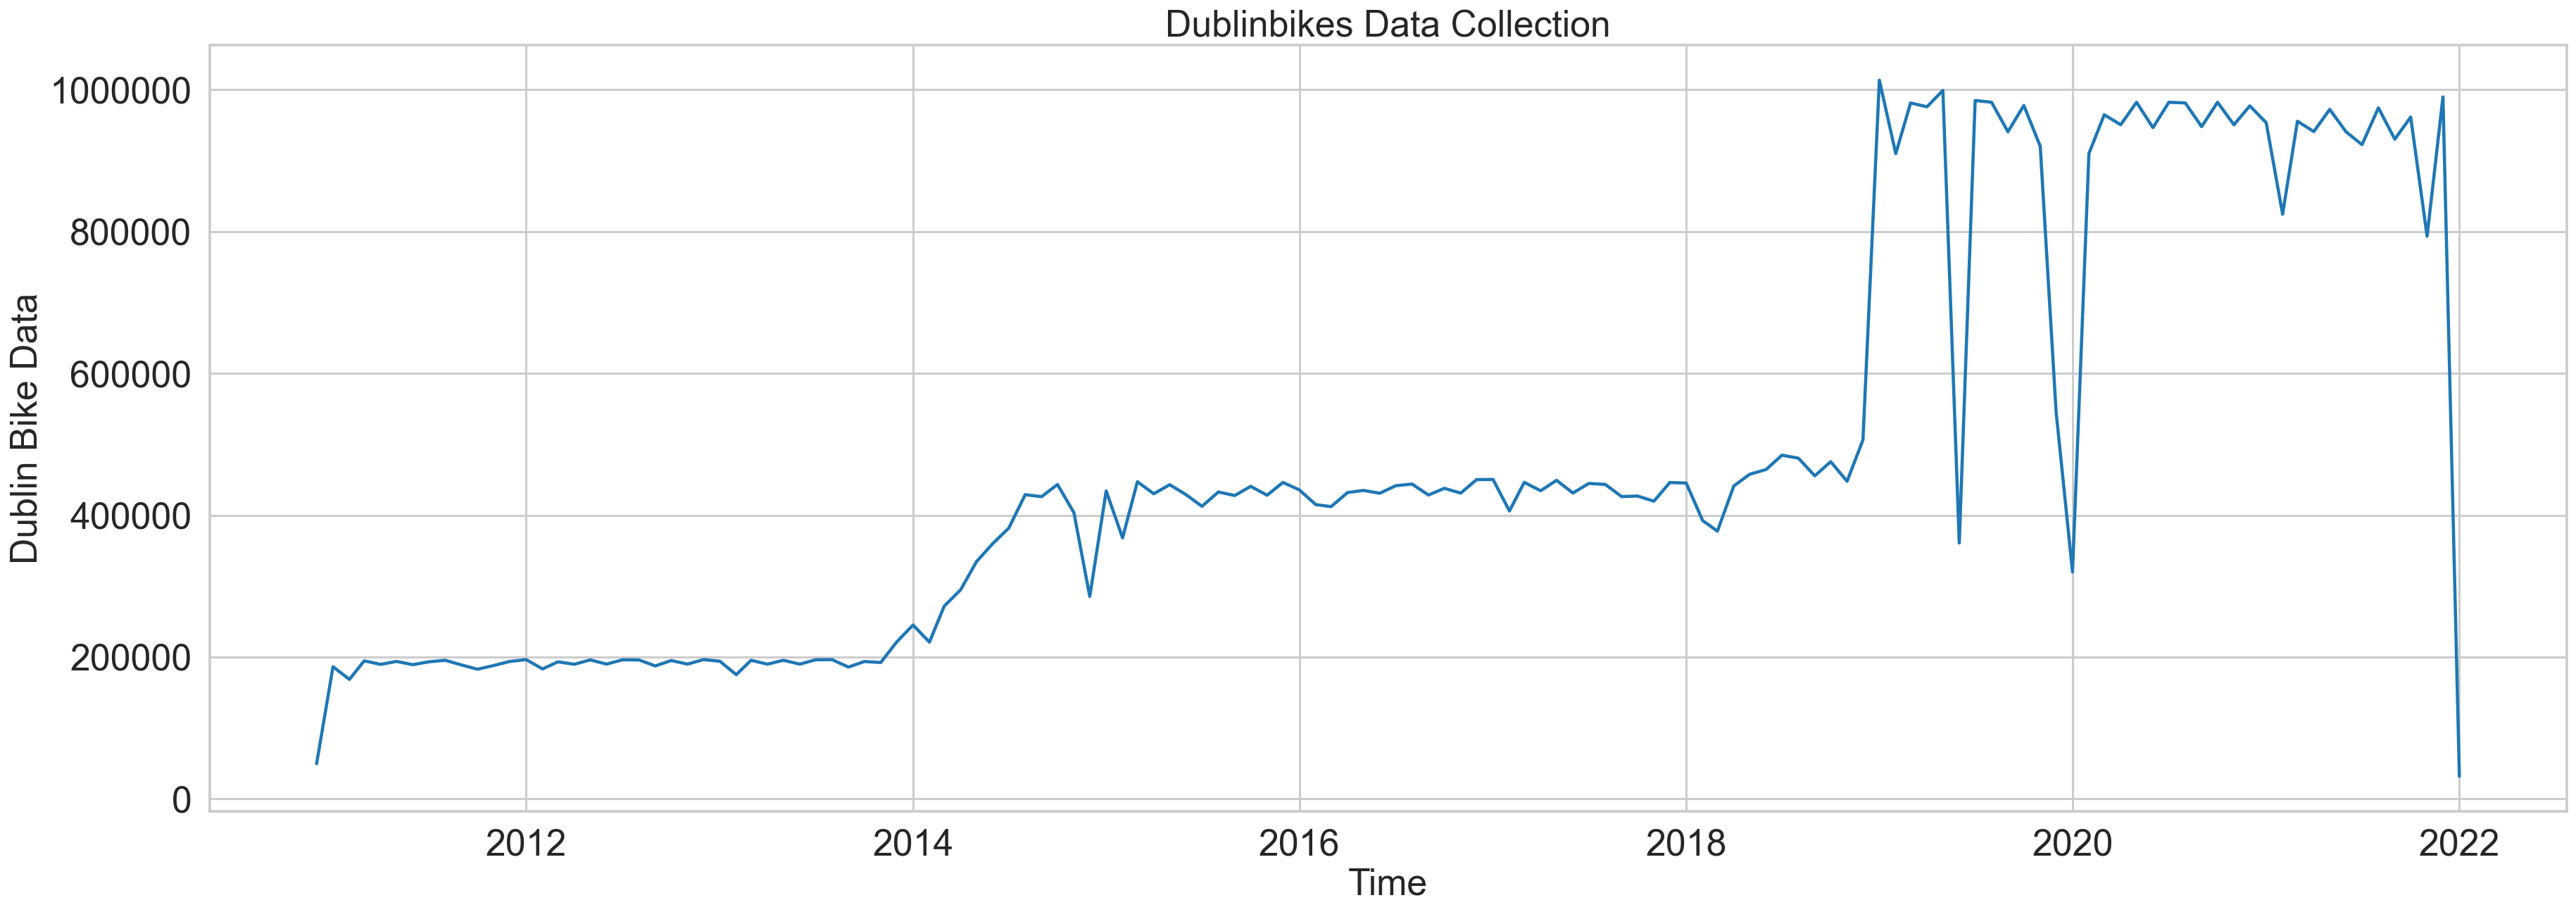

In [11]:
diff1 = combined_11_22.groupby(['year','month'])
diff2 = diff1['available_bikes'].agg(['count'])['count'].reset_index(level=['year','month'])
diff3 = pd.to_datetime(diff2['year'].astype(str) + '/' + diff2['month'].astype(str))
plt.plot(list(diff3), list(diff2['count']))
plt.title('Dublinbikes Data Collection')
plt.xlabel('Time')
plt.ylabel('Dublin Bike Data');
plt.ticklabel_format(style='plain', axis='y')

#### Reference : https://irishcycle.com/dublinbikes/
Inquiring about the statistics about data collection piqued our interest. We found that our data supply increased with time by analyzing the data rows on a time-series graph. Several factors might explain this, including the growth of Dublin bikes, an increase in activity in recent years, increase in the subscriber and more effective data collection. It is evident that data collection by jcdecaux organisation has almost doubled in 2019 approxmately to 1000000. This data collection helps us to find more trends accross all the stations and derive more insights for better understanding the bike activities.

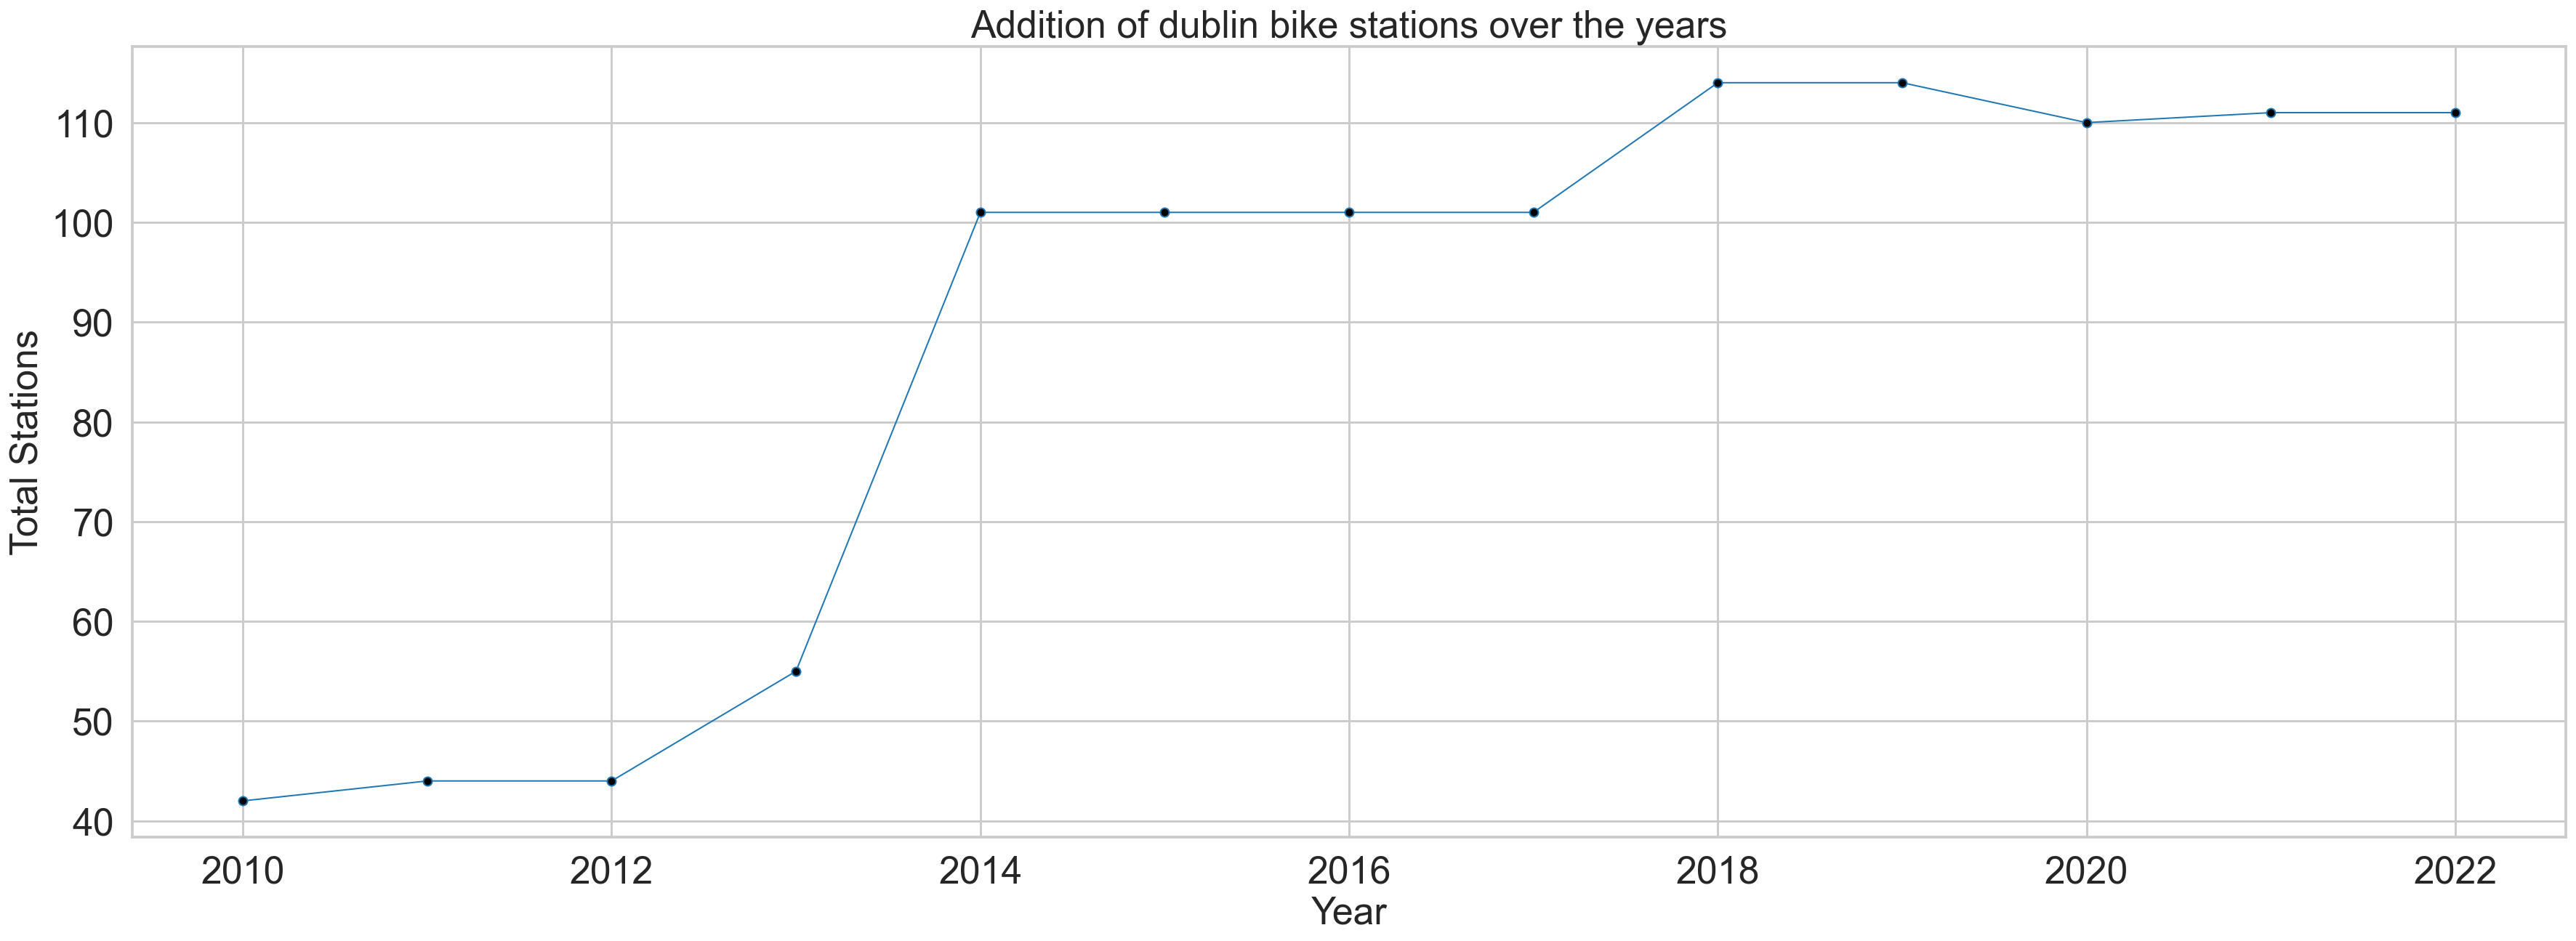

In [12]:
stations_added = combined_11_22.groupby('year')['id'].nunique().reset_index(name ='total_stations')
stations_added['new_stations'] = stations_added['total_stations'].diff()
stations_added = stations_added.reset_index()
plt.plot(stations_added['year'],stations_added['total_stations'],linewidth = 1,marker='o', markerfacecolor='black', markersize=6)
#plt.plot(stations_added_final['year'], stations_added_final['total_stations'])
plt.title('Addition of dublin bike stations over the years')
plt.xlabel('Year')
plt.ylabel('Total Stations');

##### References for additon in bike stations: 
https://www.independent.ie/irish-news/dublin-bikes-scheme-expands-with-new-stations-and-extra-bikes-29792330.html \
https://www.thejournal.ie/dublin-bike-scheme-expansion-stations-bicycles-1196211-Nov2013/

Dublin bikes is operational in the city of dublin since 2009. At the time of launch, there were 40 stations with 450 French-made unisex bikes. In 2011, 4 more stations were added with addition of 100 more cycles in the dublin city. In the 2013, multi-million euro expansion took place where further 950 bikes bringing the total to 1,500 by the July 2014 and 58 more stations were added which can be clearly seen in the above plot. Later dublin became 17th city to implement and considered one of the most succesfull bike share scheme across the world. In the year, 2016 there was huge loss(€376,000 a year) which lead to hold the expansion of bikes[wiki]

### Reference. :

### Removal of clarendon-row station 
https://www.dublincity.ie/residential/transportation/roads-and-traffic-projects/clarendon-row-improvement-scheme



### Importing dublin stations dataset and joining to final dataset

In [13]:
dbs = pd.read_csv('/Users/sreevathsadb/Masters/Project/Data/dublin_bike_stations.csv')
dbs = dbs.sort_values(by=['Number'])
dbs.sample(5)

,Number,Name,Address,Latitude,Longitude
63,69,GRAND CANAL DOCK,Grand Canal Dock,53.342638,-6.238695
4,5,CHARLEMONT PLACE,Charlemont Street,53.330662,-6.260177
101,108,AVONDALE ROAD,Avondale Road,53.359405,-6.276142
45,50,GEORGES LANE,George's Lane,53.350230,-6.279696
58,64,SANDWITH STREET,Sandwith Street,53.345203,-6.247163


In [14]:
combined_11_22 = pd.merge(combined_11_22,
                 dbs[['Number','Name', 'Latitude', 'Longitude']],
                 left_on = 'id', right_on = 'Number')
combined_11_22.columns= combined_11_22.columns.str.strip().str.lower()

In [15]:
combined_11_22['id'].unique()

array([ 17,  15,  18,   1,  19,   6,   2,  23,  21,  22,  40,  39,  16,
        37,  38,  13,  12,  11,  10,   9,  36,   8,  30,  29,  28,  27,
        26,  25,  34,   7,   5,   4,  32,  31,  24,   3,  33,  42,  41,
        43,  44,  65,  45,  54,  48,  63,  52,  56,  51,  57,  66,  67,
        64,  62,  69,  68,  90,  59,  99,  53,  58,  61,  89,  91,  73,
        88,  72,  74,  79,  82,  81,  84,  83,  85,  98,  77, 101,  96,
       102,  80,  76,  78,  87,  86, 100,  93,  71,  94,  92,  49,  75,
        55,  95,  97,  47, 103, 104,  50, 105, 106, 107, 108, 112, 110,
       111, 114, 113, 115, 109, 117, 116])

In [16]:
d = []
h = []
for year in range(2010,2023):
    for ptr in holidays.Ireland(years = year).items():
        d.append(ptr)


holiday = pd.DataFrame(d)
holiday.columns = ['timestamp', 'holiday']
holiday['year'] = pd.DatetimeIndex(holiday['timestamp']).year
holiday['day'] = pd.DatetimeIndex(holiday['timestamp']).day
holiday['month'] = pd.DatetimeIndex(holiday['timestamp']).month

#data = data
combined_11_22 = pd.merge(combined_11_22,holiday,how='left',left_on=['year','month','day'], right_on = ['year','month','day'])
combined_11_22 = combined_11_22.drop(['timestamp'], axis=1)
conditions = [
    (combined_11_22['holiday'].isnull())]

choices_holiday_ind = [0]
choices_holiday = ['casual_day']
combined_11_22['holiday'] = np.select(conditions, choices_holiday, default=combined_11_22['holiday'])

### Adding Season Column to dataset

##### https://www.bbc.com/news/uk-northern-ireland-45371322


https://www.met.ie/cms/assets/uploads/2021/02/YP-Fun-Facts-Meteorological-Seasons.pdf

In [17]:
conditions = [
    (combined_11_22['month'] == 12) | (combined_11_22['month'] == 1) | (combined_11_22['month'] == 2),
   (combined_11_22['month'] == 3) | (combined_11_22['month'] == 4) | (combined_11_22['month'] == 5),
    (combined_11_22['month'] == 6) | (combined_11_22['month'] == 7) | (combined_11_22['month'] == 8),
   (combined_11_22['month'] == 9) | (combined_11_22['month'] == 10) | (combined_11_22['month'] == 11)
    ]
values = ['Winter', 'Spring', 'Summer', 'Autumn']
combined_11_22['season'] = np.select(conditions, values)

In [18]:
combined_11_22.rename(columns = {'time':'timestamp'}, inplace = True)
combined_11_22['timestamp'] = pd.to_datetime(combined_11_22['timestamp'])
combined_11_22['date_for_merge'] = combined_11_22['timestamp'].dt.round('H')

### Adding Weather columns(Wind,Rain,Temp) and classifying wind according to Beaufort Scale 

In [19]:
weather = pd.read_csv('/Users/sreevathsadb/Masters/Project/Data/hly532.csv')
weather['date'] = pd.to_datetime(weather['date'])
weather['year'] = pd.DatetimeIndex(weather['date']).year
weather['month'] = pd.DatetimeIndex(weather['date']).month
weather = weather[(weather['year']>2009)]
#weather = weather[(weather['year']<=2022) & (weather['month']<4)]

weather = weather[['date','year','month','rain','temp','wdsp']]
weather['date_for_merge'] = weather['date'].dt.round('H')
weather['date_i'] = weather['date'].dt.date

#weather = weather[(weather['date_i']< 2021-04-01)]

weather['wdsp'] = weather['wdsp'].astype(float)
weather['rain'] = weather['rain'].astype(float)
weather['temp'] = weather['temp'].astype(float)

# Beaufort Scale

conditions = [
    (weather['wdsp'] < 1),
    ((weather['wdsp'] >=1) & (weather['wdsp'] <= 3)),
    ((weather['wdsp'] >=4) & (weather['wdsp'] <= 6)),
    ((weather['wdsp'] >=7) & (weather['wdsp'] <= 10)),
    ((weather['wdsp'] >=11) & (weather['wdsp'] <= 16)),
    ((weather['wdsp'] >=17) & (weather['wdsp'] <= 21)),
    ((weather['wdsp'] >=22) & (weather['wdsp'] <= 27)),
    ((weather['wdsp'] >=28) & (weather['wdsp'] <= 33)),
    ((weather['wdsp'] >=34) & (weather['wdsp'] <= 40)),
    ((weather['wdsp'] >=41) & (weather['wdsp'] <= 47)),
    ((weather['wdsp'] >=48) & (weather['wdsp'] <= 55)),
    ((weather['wdsp'] >=56) & (weather['wdsp'] <= 63)),
    (weather['wdsp'] >=64)]
values = ["Calm", "Light air", "Light breeze","Gentle breeze","Moderate breeze","Fresh breeze","Strong breeze","Near gale",
         "Gale","Strong gale","Storm","Violent storm","Hurricane"]
weather['wdsp_classified'] = np.select(conditions, values)


/Users/sreevathsadb/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,9,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
merged_data = pd.merge(combined_11_22, weather[['rain', 'temp', 'wdsp','wdsp_classified','date_for_merge']], on = 'date_for_merge', how = 'left')
merged_data = merged_data.sort_values(['id', 'timestamp'])


In [22]:
#combined_11_22.head(5)
#(62063153, 17)
merged_data = merged_data.sort_values(['id', 'timestamp'])

In [33]:
years = merged_data['year'].unique()
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])

In [35]:
for i in years:
    data = merged_data[merged_data['year'] == i];
    #print('/Users/sreevathsadb/Masters/Project/Data/dublin_bikes/'+str(i)+'.csv')
    data.to_csv('/Users/sreevathsadb/Masters/Project/Data/dublin_bikes/'+str(i)+'.csv', index=False)